In [85]:
#Importing necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
#Read schema data
df_info = pd.read_csv('./Data/survey_results_schema.csv')

In [87]:
#Take a look at the schema data
df_info.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [88]:
#Read survey data
df = pd.read_csv('./Data/survey_results_public.csv')

In [89]:
#Take a look at the survey data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### 1. Which countries embrace work from home most?
To answer this question, I will
1. Look at HomeRemote and Country column
2. Calculate the proporition of work from home respondents for each country
3. Create a bar plot to show the results

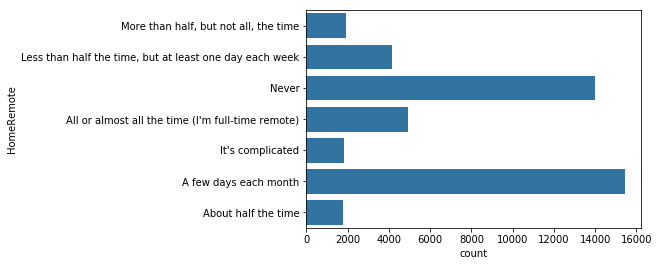

In [91]:
sns.countplot(data = df, y = 'HomeRemote', color=sns.color_palette()[0]);

In [92]:
#Drop the row if it has NaN in HomeRemote or Country column
df_wfh = df.dropna(axis=0, subset=['Country', "HomeRemote"])

In [93]:
df_wfh.shape

(44008, 154)

In [94]:
#Drop the row if it has It's complicated in HomeRemote
df_wfh = df_wfh[df_wfh['HomeRemote'] != "It's complicated"]

In [95]:
df_wfh['HomeRemote'].unique()

array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       'A few days each month', 'About half the time'], dtype=object)

In [96]:
#Drop the rows if the country has less than 300 respondents
country_count = df_wfh['Country'].value_counts()
country_count = country_count[country_count>=300]
country_keep = list(country_count.index)

In [97]:
df_wfh = df_wfh[df_wfh['Country'].isin(country_keep)]

In [98]:
#Add a new column to indicate whether the respondent work from home
df_wfh['WorkFromHome'] =  df_wfh['HomeRemote'].isin (['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time"])

In [99]:
country_wfh = df_wfh.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)

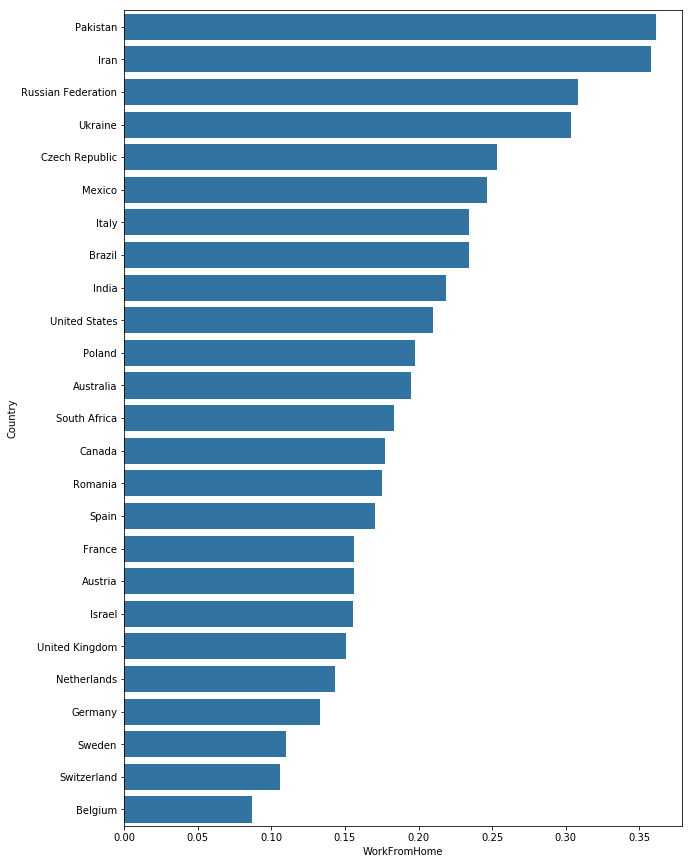

In [101]:
plt.figure(figsize=[10,15])
sns.barplot(y=country_wfh.index, x=country_wfh, color=sns.color_palette()[0]);

In [102]:
df_wfh['WorkFromHome'].mean()

0.19128549242535237